In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [3]:
# --- Simulação de dados ---

# Alturas em cm de uma amostra de 100 homens adultos
alturas =( 174.97, 168.62, 176.48, 185.23, 167.66, 167.66, 185.79, 177.67,
       165.31, 175.43, 165.37, 165.34, 172.42, 150.87, 152.75, 164.38,
       159.87, 173.14, 160.92, 155.88, 184.66, 167.74, 170.68, 155.75,
       164.56, 171.11, 158.49, 173.76, 163.99, 167.08, 163.98, 188.52,
       169.87, 159.42, 178.23, 157.79, 172.09, 150.4 , 156.72, 171.97,
       177.38, 171.71, 168.84, 166.99, 155.21, 162.8 , 165.39, 180.57,
       173.44, 152.37, 173.24, 166.15, 163.23, 176.12, 180.31, 179.31,
       161.61, 166.91, 173.31, 179.76, 165.21, 168.14, 158.94, 158.04,
       178.13, 183.56, 169.28, 180.04, 173.62, 163.55, 173.61, 185.38,
       169.64, 185.65, 143.8 , 178.22, 170.87, 167.01, 170.92, 150.12,
       167.8 , 173.57, 184.78, 164.82, 161.92, 164.98, 179.15, 173.29,
       164.7 , 175.13, 170.97, 179.69, 162.98, 166.72, 166.08, 155.36,
       172.96, 172.61, 170.05, 167.65)

In [4]:
# -----------------------------
# 2. Padronização (escore-Z)
# -----------------------------
media = np.mean(alturas)          # média da amostra
desvio = np.std(alturas)          # desvio padrão da amostra
alturas_z = (alturas - media) / desvio  # transformação para Z

In [5]:
# -----------------------------
# 3. Estatísticas descritivas
# -----------------------------
print(f"Média original: {media:.2f}, Desvio padrão original: {desvio:.2f}")
print(f"Média padronizada: {np.mean(alturas_z):.2f}, Desvio padrão padronizada: {np.std(alturas_z):.2f}")

Média original: 168.96, Desvio padrão original: 9.04
Média padronizada: -0.00, Desvio padrão padronizada: 1.00


In [6]:
# -----------------------------
# 4. Pontos de inflexão
# -----------------------------
# Para uma normal, os pontos de inflexão ocorrem em μ ± σ
inflec1 = media - desvio
inflec2 = media + desvio


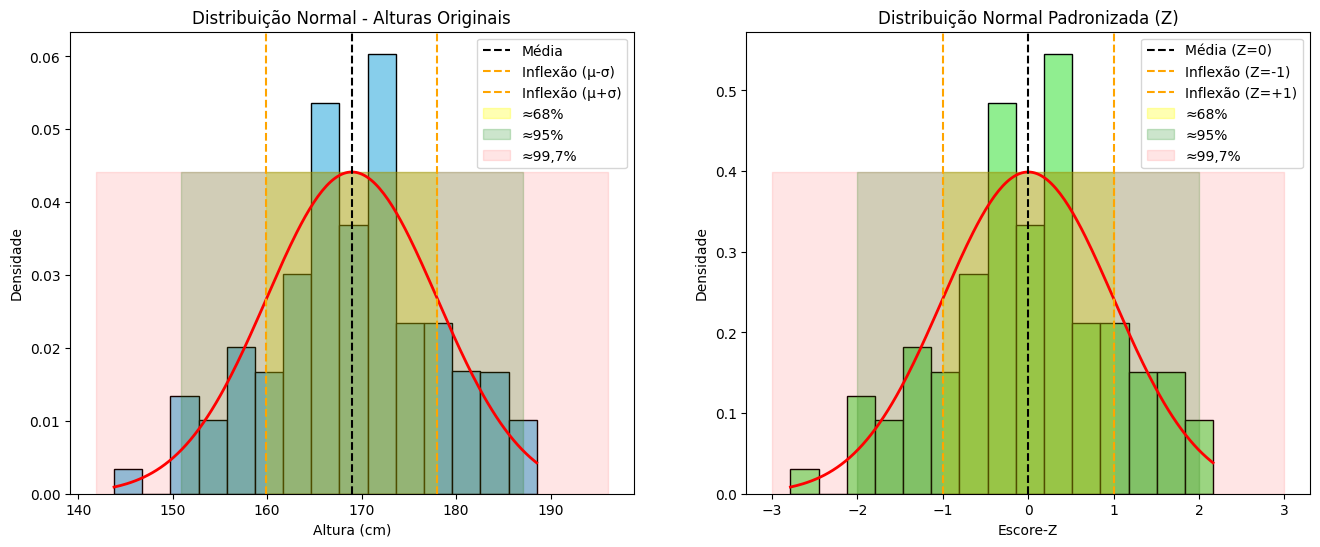

In [7]:
# -----------------------------
# 5. Gráficos comparativos
# -----------------------------
fig, axes = plt.subplots(1, 2, figsize=(16,6))

# (a) Distribuição original
x = np.linspace(min(alturas), max(alturas), 200)
axes[0].hist(alturas, bins=15, density=True, color='skyblue', edgecolor='black')
axes[0].plot(x, norm.pdf(x, media, desvio), 'r', lw=2)  # curva normal
# Linhas de referência
axes[0].axvline(media, color='black', linestyle='--', label='Média')
axes[0].axvline(inflec1, color='orange', linestyle='--', label='Inflexão (μ-σ)')
axes[0].axvline(inflec2, color='orange', linestyle='--', label='Inflexão (μ+σ)')
# Regra Empírica (68-95-99,7)
axes[0].fill_betweenx([0, max(norm.pdf(x, media, desvio))], media-desvio, media+desvio, color='yellow', alpha=0.3, label='≈68%')
axes[0].fill_betweenx([0, max(norm.pdf(x, media, desvio))], media-2*desvio, media+2*desvio, color='green', alpha=0.2, label='≈95%')
axes[0].fill_betweenx([0, max(norm.pdf(x, media, desvio))], media-3*desvio, media+3*desvio, color='red', alpha=0.1, label='≈99,7%')
# Rótulos
axes[0].set_title("Distribuição Normal - Alturas Originais")
axes[0].set_xlabel("Altura (cm)")
axes[0].set_ylabel("Densidade")
axes[0].legend()

# (b) Distribuição padronizada
x_z = np.linspace(min(alturas_z), max(alturas_z), 200)
axes[1].hist(alturas_z, bins=15, density=True, color='lightgreen', edgecolor='black')
axes[1].plot(x_z, norm.pdf(x_z, 0, 1), 'r', lw=2)  # curva normal padrão
# Linhas de referência
axes[1].axvline(0, color='black', linestyle='--', label='Média (Z=0)')
axes[1].axvline(-1, color='orange', linestyle='--', label='Inflexão (Z=-1)')
axes[1].axvline(1, color='orange', linestyle='--', label='Inflexão (Z=+1)')
# Regra Empírica
axes[1].fill_betweenx([0, max(norm.pdf(x_z, 0, 1))], -1, 1, color='yellow', alpha=0.3, label='≈68%')
axes[1].fill_betweenx([0, max(norm.pdf(x_z, 0, 1))], -2, 2, color='green', alpha=0.2, label='≈95%')
axes[1].fill_betweenx([0, max(norm.pdf(x_z, 0, 1))], -3, 3, color='red', alpha=0.1, label='≈99,7%')
# Rótulos
axes[1].set_title("Distribuição Normal Padronizada (Z)")
axes[1].set_xlabel("Escore-Z")
axes[1].set_ylabel("Densidade")
axes[1].legend()

plt.show()

